## The attached code is a run of the Random Forest Regressor model on data from booking without the addition of new features


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Random Forest Regressor Results:
Train R2: 0.9655170362375495
Train RMSE: 74.49335373645096
Train MSE: 5549.259750904011
Train MAE: 52.736031855994746
Test R2: 0.9628933346902814
Test RMSE: 77.1447453330361
Test MSE: 5951.311732498995
Test MAE: 54.77921448897069
Best Parameters: {'max_depth': 9, 'min_samples_leaf': 4, 'min_samples_split': 6, 'n_estimators': 100}

Cross-Validation Results (Training Group):
CV R2: 0.9636198173316796
CV RMSE: 76.50454908688025
CV MAE: 54.24281201377213


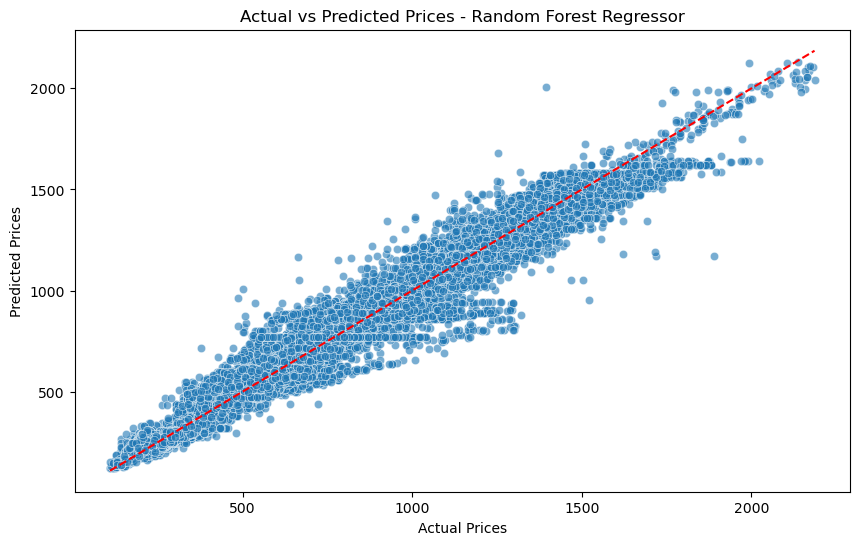

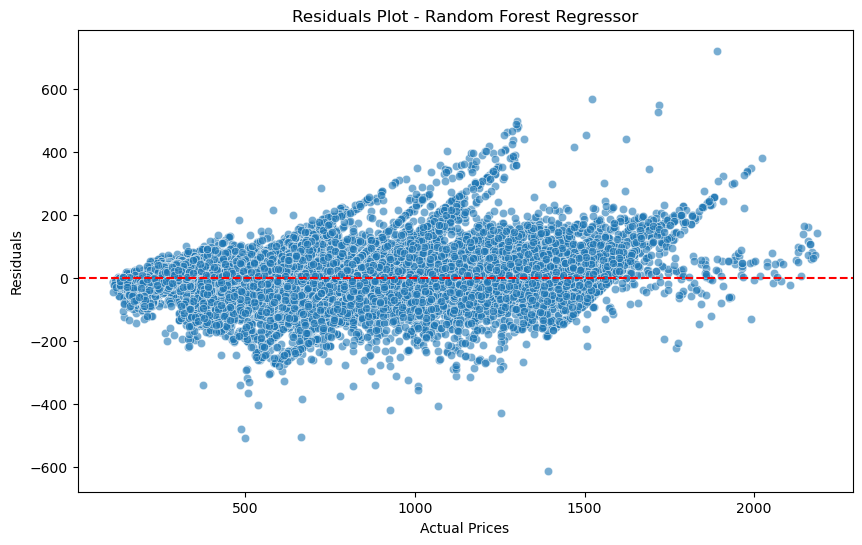

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df1 = pd.read_csv('./0507_cleaned_booking_hotels.csv')
df2 = pd.read_csv('./2506_cleaned_booking_hotels.csv')
df3 = pd.read_csv('./20_06_hotels_data_cleaned.csv')

# Merge the dataframes
df = pd.concat([df1, df2, df3], ignore_index=True)

# Function to fill NaN values with the mean of the group
def fill_na_with_group_mean(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        df[col].fillna(df[col].mean(), inplace=True)
    return df

# Fill NaN values for the entire dataset
df = fill_na_with_group_mean(df)

# Keep only numeric columns
df = df.select_dtypes(include=[np.number])

# Remove columns with all NaN values
df = df.dropna(axis=1, how='all')

# Remove the price_per_night column
if 'price_per_night' in df.columns:
    df = df.drop(columns=['price_per_night'])
    
# Ensure there are no remaining NaN values
imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Split the data into train and test sets (70% train, 30% test)
X = df.drop(columns=['price'])
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'max_depth': [7,8,9],
    'min_samples_split': [6, 7],
    'min_samples_leaf': [4, 6],
    'n_estimators': [ 75, 100]
}

# Initialize Random Forest Regressor with GridSearchCV
model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best model from GridSearchCV
best_model = grid_search.best_estimator_

# Predictions
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Training metrics
train_r2 = r2_score(y_train, y_train_pred)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)

# Test metrics
test_r2 = r2_score(y_test, y_test_pred)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

# Perform cross-validation
cv_r2_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='r2')
cv_rmse_scores = np.sqrt(-cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
cv_mae_scores = -cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

# Print results
print("Random Forest Regressor Results:")
print(f"Train R2: {train_r2}")
print(f"Train RMSE: {train_rmse}")
print(f"Train MSE: {train_mse}")
print(f"Train MAE: {train_mae}")
print(f"Test R2: {test_r2}")
print(f"Test RMSE: {test_rmse}")
print(f"Test MSE: {test_mse}")
print(f"Test MAE: {test_mae}")
print(f"Best Parameters: {grid_search.best_params_}")

# Cross-validation results
print("\nCross-Validation Results (Training Group):")
print(f"CV R2: {np.mean(cv_r2_scores)}")
print(f"CV RMSE: {np.mean(cv_rmse_scores)}")
print(f"CV MAE: {np.mean(cv_mae_scores)}")

# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.6)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices - Random Forest Regressor')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()

# Residual plot
residuals = y_test - y_test_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.title(f'Residuals Plot - Random Forest Regressor')
plt.show()


## The attached code is a run of the Random Forest Regressor model on booking data with additions of new features and after we have done one hot encoding for them (a period of the month - beginning, middle and end, day of the week of check in, day of the week of check out)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Random Forest Regressor Results:
Train R2: 0.9790857473754192
Train RMSE: 58.90265517908298
Train MSE: 3469.5227871459506
Train MAE: 37.59795376019542
Test R2: 0.9785226669543187
Test RMSE: 60.34993252903435
Test MSE: 3642.1143562589978
Test MAE: 38.88696553599747
Best Parameters: {'max_depth': 9, 'min_samples_leaf': 4, 'min_samples_split': 6, 'n_estimators': 100}

Cross-Validation Results (Training Group):
CV R2: 0.9778704459068968
CV RMSE: 60.568731594345216
CV MAE: 38.744061737256345


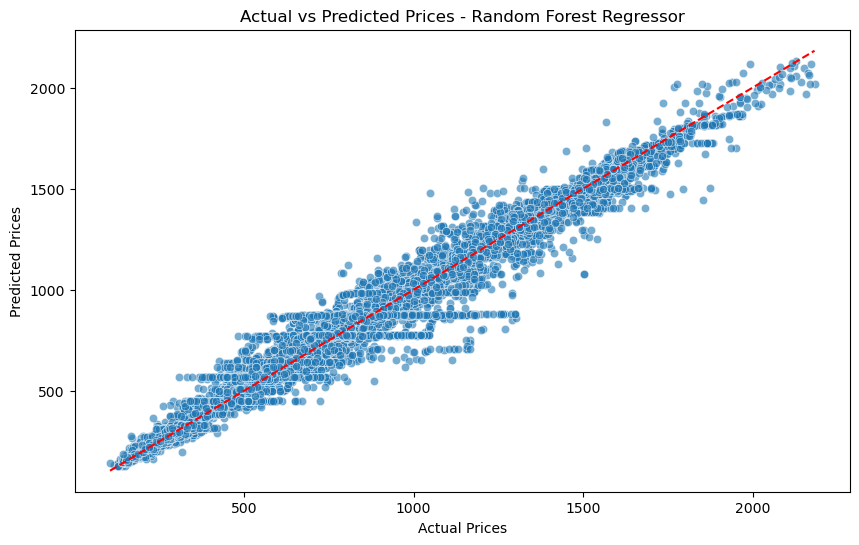

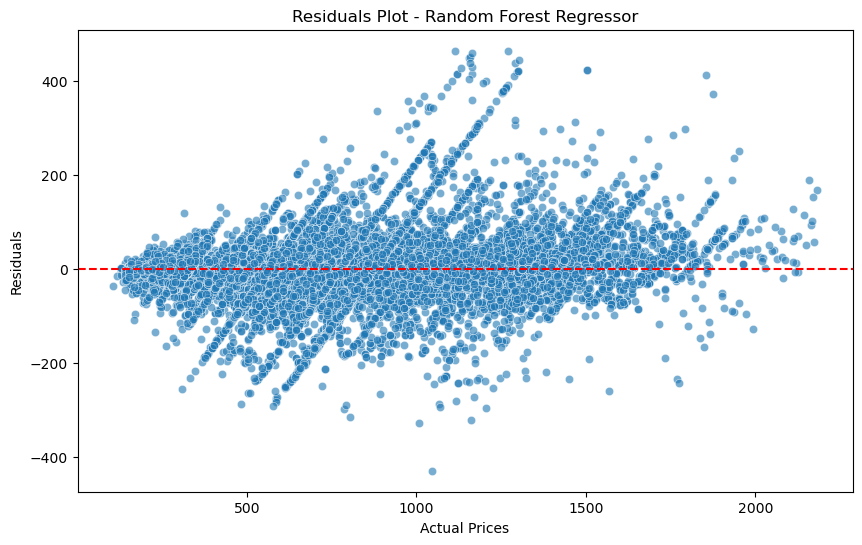

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df1 = pd.read_csv('./05_07_hotels_data_cleaned_with_days_name_parameters_period_encoded.csv')
df2 = pd.read_csv('./25_06_hotels_data_cleaned_with_days_name_parameters_period_encoded.csv')
df3 = pd.read_csv('./20_06_hotels_data_cleaned_with_new_parameters_encoded.csv')

# Merge the dataframes
df = pd.concat([df1, df2, df3], ignore_index=True)

# Function to fill NaN values with the mean of the group
def fill_na_with_group_mean(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        df[col].fillna(df[col].mean(), inplace=True)
    return df

# Fill NaN values for the entire dataset
df = fill_na_with_group_mean(df)

# Keep only numeric columns
df = df.select_dtypes(include=[np.number])

# Remove columns with all NaN values
df = df.dropna(axis=1, how='all')

# Remove the price_per_night column
if 'price_per_night' in df.columns:
    df = df.drop(columns=['price_per_night'])
    
# Ensure there are no remaining NaN values
imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)


X = df.drop(columns=['price'])
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'max_depth': [7,8,9],
    'min_samples_split': [6, 7],
    'min_samples_leaf': [4, 6],
    'n_estimators': [ 75, 100]
}

# Initialize Random Forest Regressor with GridSearchCV
model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best model from GridSearchCV
best_model = grid_search.best_estimator_

# Predictions
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Training metrics
train_r2 = r2_score(y_train, y_train_pred)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)

# Test metrics
test_r2 = r2_score(y_test, y_test_pred)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

# Perform cross-validation
cv_r2_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='r2')
cv_rmse_scores = np.sqrt(-cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
cv_mae_scores = -cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

# Print results
print("Random Forest Regressor Results:")
print(f"Train R2: {train_r2}")
print(f"Train RMSE: {train_rmse}")
print(f"Train MSE: {train_mse}")
print(f"Train MAE: {train_mae}")
print(f"Test R2: {test_r2}")
print(f"Test RMSE: {test_rmse}")
print(f"Test MSE: {test_mse}")
print(f"Test MAE: {test_mae}")
print(f"Best Parameters: {grid_search.best_params_}")

# Cross-validation results
print("\nCross-Validation Results (Training Group):")
print(f"CV R2: {np.mean(cv_r2_scores)}")
print(f"CV RMSE: {np.mean(cv_rmse_scores)}")
print(f"CV MAE: {np.mean(cv_mae_scores)}")

# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.6)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices - Random Forest Regressor')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()

# Residual plot
residuals = y_test - y_test_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.title(f'Residuals Plot - Random Forest Regressor')
plt.show()


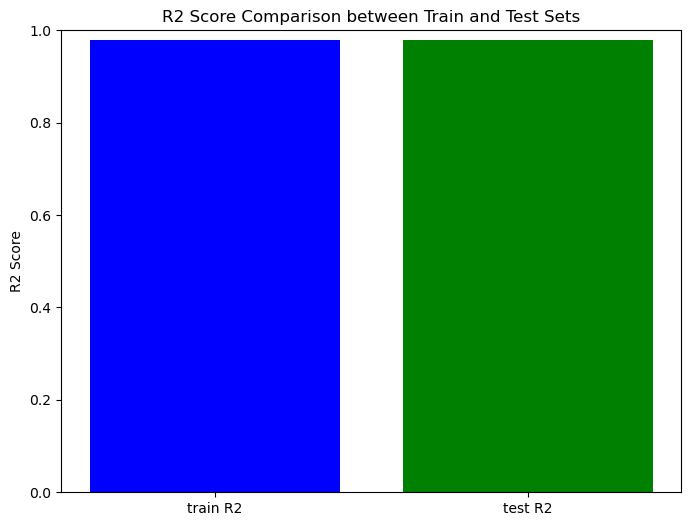

In [3]:

r2_values = [train_r2, test_r2]
labels = ['train R2', 'test R2']

plt.figure(figsize=(8, 6))
plt.bar(labels, r2_values, color=['blue', 'green'])
plt.ylim(0, 1)  # R2 values range from 0 to 1
plt.ylabel('R2 Score')
plt.title('R2 Score Comparison between Train and Test Sets')
plt.show()



## summary and Conclusions:
In this notebook we ran the random forest regression model at different depths. We performed a network search on the algorithm values ​​and divided the data into 3 subgroups according to recommendations we saw on the Internet. Our network search included the following parameters:

max_depth - the maximum depth of each tree in the forest.
min_samples_split - The minimum number of samples to use to split a node in the tree. This parameter is particularly important and we made sure that it would not be lower than 6 to avoid a situation of overfitting that can be significantly reflected in algorithms based on trees.

min_samples_leaf - the minimum number of samples that should be a leaf in the tree. Here, too, we made sure that it would not be lower than 4 to avoid a situation of over-adjustment.

n_estimators - the number of trees in the random forest. Here, too, we made sure to perform a network search on relatively large numbers to avoid a situation of overmatching. This cost us a very high runtime and is the downside of the grid search, but we decided it was better than an overfitting situation.

Of course we took the best parameters.

The results of the algorithm were satisfactory in terms of their quality (R2 score=0.98, MAE=38),
In addition, it can be seen that the cross-validation data confirms the test and training data, so the chance of overfit is very low.

It can also be said that adding the new features did improve the r2 score and reduce the average error.

los                                           0.497777
LOS                                           0.334548
index                                         0.115706
TTT                                           0.024817
checkout_day                                  0.009425
checkin_day                                   0.004548
checkin_day_name_Sunday                       0.001897
checkout_day_name_Tuesday                     0.001745
checkout_day_name_Monday                      0.001249
checkin_day_name_Thursday                     0.001218
checkout_day_name_Sunday                      0.000950
checkin_day_name_Tuesday                      0.000817
checkin_day_name_Friday                       0.000645
checkin_day_name_Saturday                     0.000602
checkout_day_name_Saturday                    0.000530
checkout_day_name_Friday                      0.000404
reviews                                       0.000387
score                                         0.000320
checkin_da

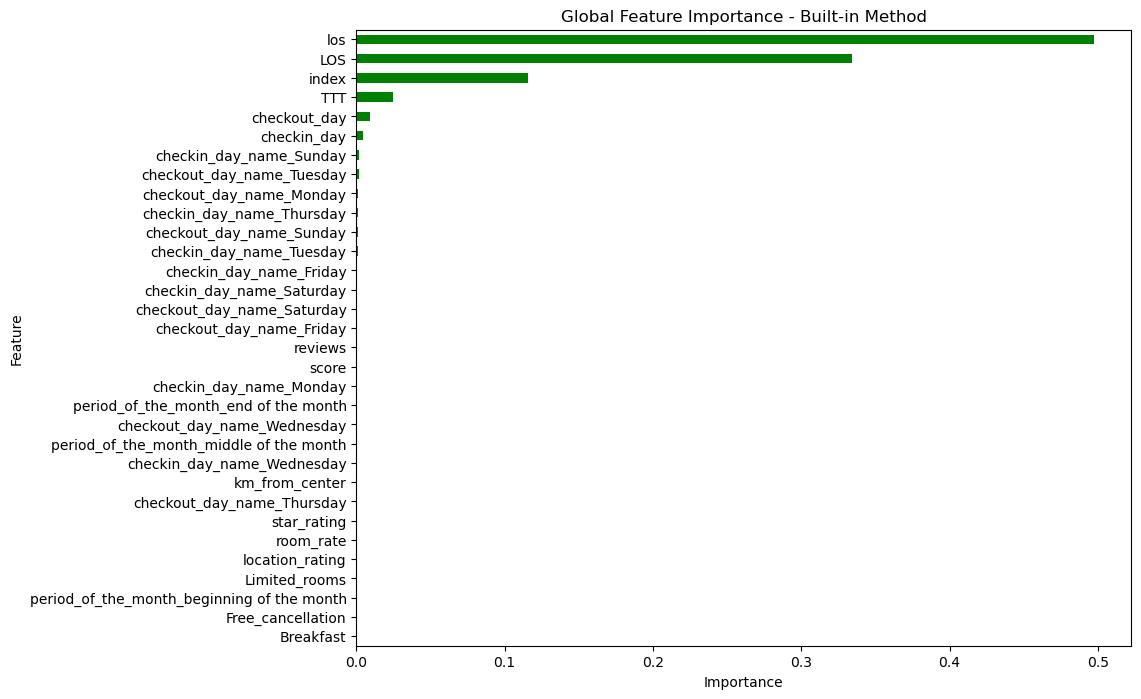

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Update the parameters of the RandomForestRegressor
best_params = {
    'max_depth': 12,
    'min_samples_leaf': 4,
    'min_samples_split': 6,
    'n_estimators': 100,
    'random_state': 42
}

lr10 = RandomForestRegressor(**best_params)
lr10.fit(X_train, y_train)

# Assuming X_train and X_test have the same columns
feature_names = X_train.columns

# Convert feature importances to a pandas Series
global_importances = pd.Series(lr10.feature_importances_, index=feature_names)

# Sort the importances Series
global_importances_sorted = global_importances.sort_values(ascending=False)

# Print the sorted feature importances
print(global_importances_sorted)

# Plot the sorted feature importances
plt.figure(figsize=(10, 8))
global_importances_sorted.plot(kind='barh', color='green')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Global Feature Importance - Built-in Method")
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()


                                       feature  importance
2                                          los    1.171000
31                                         LOS    0.563352
9                                        index    0.247454
7                                          TTT    0.061300
13                                checkout_day    0.020306
12                                 checkin_day    0.006327
17                     checkin_day_name_Sunday    0.002557
26                   checkout_day_name_Tuesday    0.002004
22                    checkout_day_name_Monday    0.001643
18                   checkin_day_name_Thursday    0.001635
24                    checkout_day_name_Sunday    0.001063
19                    checkin_day_name_Tuesday    0.000906
14                     checkin_day_name_Friday    0.000797
16                   checkin_day_name_Saturday    0.000725
23                  checkout_day_name_Saturday    0.000571
21                    checkout_day_name_Friday    0.0004

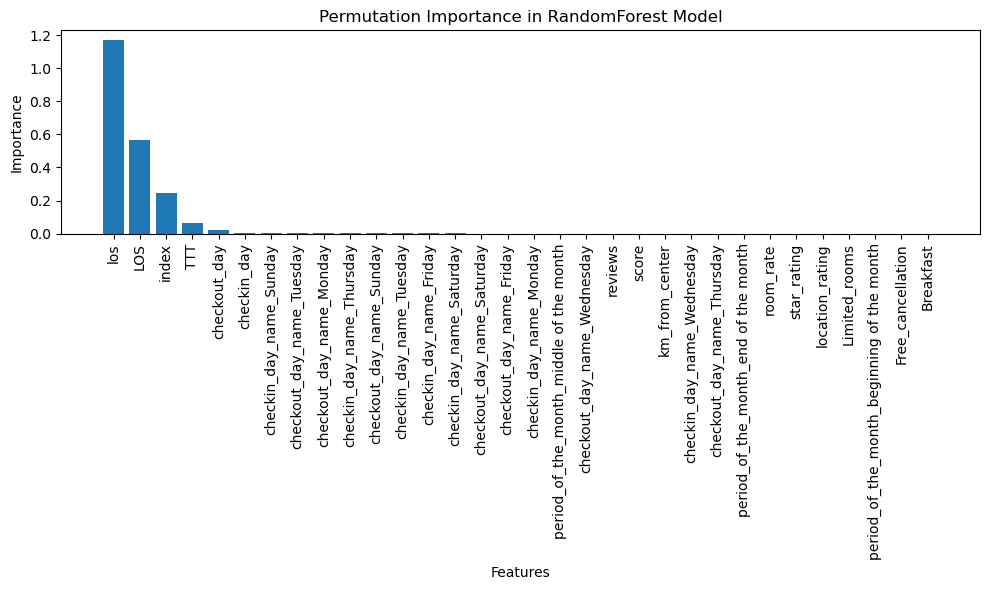

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

# Update the parameters of the RandomForestRegressor
best_params = {
    'max_depth': 12,
    'min_samples_leaf': 4,
    'min_samples_split': 6,
    'n_estimators': 100,
    'random_state': 42
}

# Train the RandomForestRegressor with specified parameters
lr10 = RandomForestRegressor(**best_params)
lr10.fit(X_train, y_train)

# Compute permutation importance
perm_importance = permutation_importance(lr10, X_test, y_test, n_repeats=5, random_state=42)

# Create DataFrame to store feature importance
feature_importance_df = pd.DataFrame({
    'feature': X_test.columns,
    'importance': perm_importance.importances_mean
}).sort_values(by='importance', ascending=False)

# Print the DataFrame
print(feature_importance_df)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['feature'], feature_importance_df['importance'])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Permutation Importance in RandomForest Model')
plt.tight_layout()
plt.show()


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Random Forest Regressor Results:
Train R2: 0.9796582240839192
Train RMSE: 59.13155155336604
Train MSE: 3496.5403891083856
Train MAE: 37.591297153762156
Test R2: 0.9715655744764385
Test RMSE: 63.92430973689342
Test MSE: 4086.3173753382866
Test MAE: 47.61085707902487
Best Parameters: {'max_depth': 9, 'min_samples_leaf': 4, 'min_samples_split': 6, 'n_estimators': 100}

Cross-Validation Results (Training Group):
CV R2: 0.9264951513652235
CV RMSE: 97.66243210731996
CV MAE: 63.706783493923545


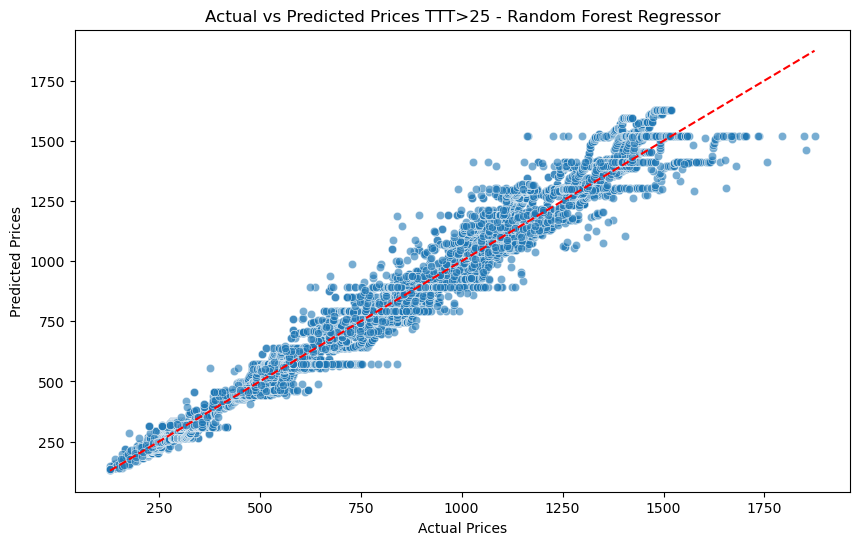

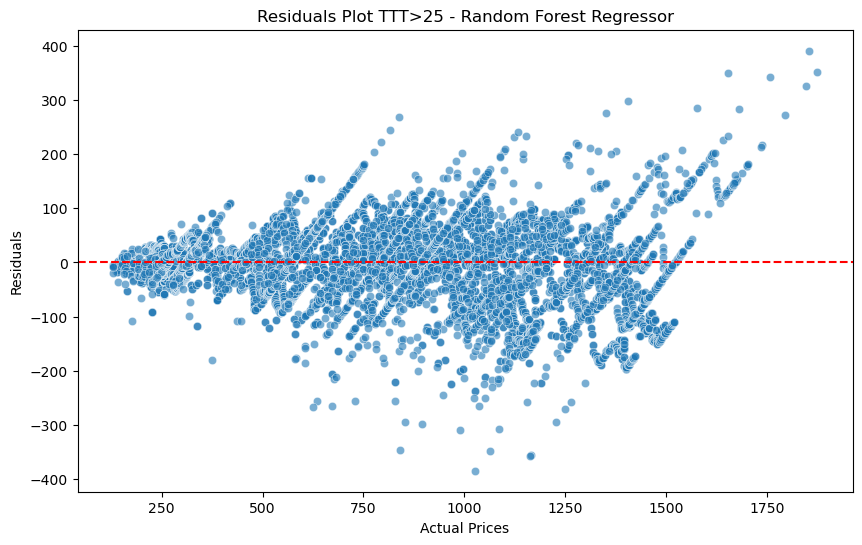

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df1 = pd.read_csv('./05_07_hotels_data_cleaned_with_days_name_parameters_period_encoded.csv')
df2 = pd.read_csv('./25_06_hotels_data_cleaned_with_days_name_parameters_period_encoded.csv')
df3 = pd.read_csv('./20_06_hotels_data_cleaned_with_new_parameters_encoded.csv')

# Merge the dataframes
df = pd.concat([df1, df2, df3], ignore_index=True)

# Function to fill NaN values with the mean of the group
def fill_na_with_group_mean(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        df[col].fillna(df[col].mean(), inplace=True)
    return df

# Fill NaN values for the entire dataset
df = fill_na_with_group_mean(df)

# Keep only numeric columns
df = df.select_dtypes(include=[np.number])

# Remove columns with all NaN values
df = df.dropna(axis=1, how='all')

# Remove the price_per_night column
if 'price_per_night' in df.columns:
    df = df.drop(columns=['price_per_night'])

# Ensure there are no remaining NaN values
imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Split the data into train and test sets based on TTT value
train_df = df[df['TTT'] <= 25]
test_df = df[df['TTT'] > 25]

X_train = train_df.drop(columns=['price'])
y_train = train_df['price']
X_test = test_df.drop(columns=['price'])
y_test = test_df['price']

# Define the parameter grid for GridSearchCV
param_grid = {
    'max_depth': [9],
    'min_samples_split': [6],
    'min_samples_leaf': [4],
    'n_estimators': [ 100]
}

# Initialize Random Forest Regressor with GridSearchCV
model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best model from GridSearchCV
best_model = grid_search.best_estimator_

# Predictions
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Training metrics
train_r2 = r2_score(y_train, y_train_pred)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)

# Test metrics
test_r2 = r2_score(y_test, y_test_pred)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

# Perform cross-validation
cv_r2_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='r2')
cv_rmse_scores = np.sqrt(-cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
cv_mae_scores = -cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

# Print results
print("Random Forest Regressor Results:")
print(f"Train R2: {train_r2}")
print(f"Train RMSE: {train_rmse}")
print(f"Train MSE: {train_mse}")
print(f"Train MAE: {train_mae}")
print(f"Test R2: {test_r2}")
print(f"Test RMSE: {test_rmse}")
print(f"Test MSE: {test_mse}")
print(f"Test MAE: {test_mae}")
print(f"Best Parameters: {grid_search.best_params_}")

# Cross-validation results
print("\nCross-Validation Results (Training Group):")
print(f"CV R2: {np.mean(cv_r2_scores)}")
print(f"CV RMSE: {np.mean(cv_rmse_scores)}")
print(f"CV MAE: {np.mean(cv_mae_scores)}")

# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.6)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices TTT>25 - Random Forest Regressor')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()

# Residual plot
residuals = y_test - y_test_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.title(f'Residuals Plot TTT>25 - Random Forest Regressor')
plt.show()
